In [ ]:
import pandas as pd
import pickle 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [ ]:
url='https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet'
dat1 = pd.read_parquet(url)

In [ ]:
dat1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [ ]:
dat1.shape

(2463931, 19)

In [ ]:
dat1.tpep_pickup_datetime = pd.to_datetime(dat1.tpep_pickup_datetime)
dat1.tpep_dropoff_datetime = pd.to_datetime(dat1.tpep_dropoff_datetime)
dat1['duration'] = dat1.tpep_dropoff_datetime - dat1.tpep_pickup_datetime

In [ ]:
dat1.duration = dat1.duration.apply(lambda td: td.total_seconds()/60)
dat1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333


In [ ]:
dat1.duration.describe()

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
25%      6.316667e+00
50%      1.018333e+01
75%      1.616667e+01
max      8.513183e+03
Name: duration, dtype: float64

In [ ]:
dat1 = dat1[(dat1.duration >= 1) & (dat1.duration <= 60)]

In [ ]:
from pandas.core.arrays import categorical
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [ ]:
dat1[categorical] = dat1[categorical].astype(str)

In [ ]:
train_dit = dat1[categorical + numerical].to_dict(orient='records')

In [ ]:
dt = DictVectorizer()

x_train = dt.fit_transform(train_dit)

In [ ]:
x_train

<2421440x516 sparse matrix of type '<class 'numpy.float64'>'
	with 7264320 stored elements in Compressed Sparse Row format>

In [ ]:
target = 'duration'
y_train = dat1[target].values

In [ ]:
y_train

array([17.81666667,  8.4       ,  8.96666667, ..., 11.        ,
       12.05      , 27.        ])

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_train)
mean_squared_error(y_train, y_pred, squared=False)


7.001496179427095

<ipython-input-18-ed14fde60bed>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label= 'prediction')
<ipython-input-18-ed14fde60bed>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


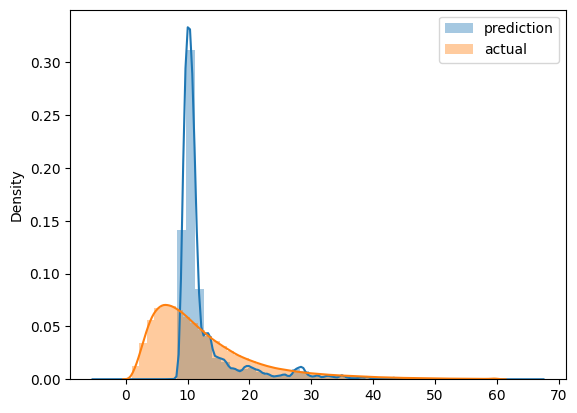

In [ ]:
sns.distplot(y_pred, label= 'prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [ ]:
def read_dataframe(filename):
   if filename.endswith('.csv'):
    dat1.read_csv(filename)
    
    dat1.tpep_pickup_datetime = pd.to_datetime(dat1.tpep_pickup_datetime)
    dat1.tpep_dropoff_datetime = pd.to_datetime(dat1.tpep_dropoff_datetime)
   elif filename.endswith('.parquet'):
    dat1 = pd.read_parquet(filename) 
  
   dat1['duration'] = dat1.tpep_dropoff_datetime - dat1.tpep_pickup_datetime
   dat1.duration = dat1.duration.apply(lambda td: td.total_seconds()/60)
  
   dat1 = dat1[(dat1.duration >= 1) & (dat1.duration <= 60)]

   categorical = ['PULocationID', 'DOLocationID']
   dat1[categorical] = dat1[categorical].astype(str)
   
   return dat1 


In [ ]:
dat1_train = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet')
dat1_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet')

In [ ]:
len(dat1_train), len(dat1_val)

(2421440, 2918187)

In [ ]:
dat1_train['PU_DO'] = dat1_train['PULocationID'] + '_' + dat1_train['DOLocationID']
dat1_val['PU_DO'] = dat1_val['PULocationID'] + '_' + dat1_val['DOLocationID']

In [ ]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dt = DictVectorizer()

train_dit = dat1_train[categorical + numerical].to_dict(orient='records')
x_train = dt.fit_transform(train_dit)

val_dit = dat1_val[categorical + numerical].to_dict(orient='records')
x_val = dt.transform(val_dit)

In [ ]:
target = 'duration'
y_train = dat1_train[target].values
y_val = dat1_val[target].values

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_val)

mean_squared_error(y_val, y_pred, squared=False)

5.530232787149262

In [ ]:
with open('models', 'wb') as f_out:
    pickle.dump((dt, lr), f_out)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_train)

mean_squared_error(y_train, y_pred, squared=False)

4.797266930446025

In [ ]:
lr = Lasso()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_val)

mean_squared_error(y_val, y_pred, squared=False)

9.708000985372925

In [ ]:
lr = Ridge()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_val)

mean_squared_error(y_val, y_pred, squared=False)

5.436573145497149